In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

Ref:
- http://ex2tron.wang/

# Load/Display/Save figure

In [18]:
img = cv2.imread('./photos/lena.jpg',1)

In [19]:
def plot(img):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xticks([]), plt.yticks([])
    plt.imshow(img_)
    plt.show()

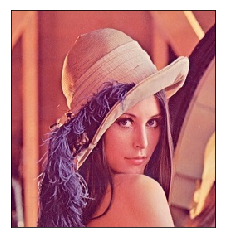

In [20]:
plot(img)

In [5]:
cv2.imwrite('./photos/lena_gray.jpg', img)

True

# Capture Video

In [20]:
capture = cv2.VideoCapture(0)
while(True):
    ret, frame = capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) == ord('q'):
        break

# Extract Value

In [6]:
px = img[100, 90]
print(px)  # [103 98 197]
px_blue = img[100, 90, 0]
print(px_blue)  #  B, G, R

[105  97 197]
105


In [7]:
print(img.shape)  # (263, 247, 3)
# row, column, num_of_channels
height, width, channels = img.shape

(263, 247, 3)


In [8]:
print(img.dtype) 

uint8


In [9]:
print(img.size) # 268 * 247 * 3

194883


# Region of Interest (ROI)

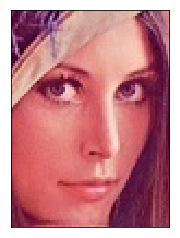

In [10]:
face = img[100:200, 115:188]
plot(face)

# Channel split and merge

In [11]:
b, g, r = cv2.split(img)
img = cv2.merge((b, g, r))

# Convert to Gray

In [12]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags[:3])

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA']


In [13]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray=R*0.299+G*0.587+B*0.114

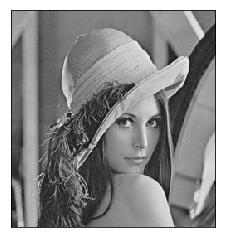

In [14]:
plot(img_gray)

# Color Recognition

In [15]:
img = cv2.imread('./photos/blue.jpg',1)

In [16]:
blue = np.uint8([[[255, 0, 0]]])
hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
print(hsv_blue)

[[[120 255 255]]]


In [17]:
# Range for BLUE
lower_blue = np.array([100, 110, 110])
upper_blue = np.array([130, 255, 255])

In [18]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [19]:
mask = cv2.inRange(hsv, lower_blue, upper_blue)

In [20]:
res = cv2.bitwise_and(img, img, mask=mask)

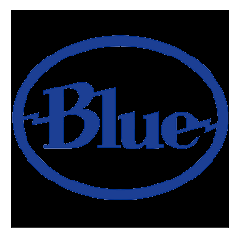

In [21]:
plot(res)

# Convert to 2 types by thresholds

In [22]:
img = cv2.imread('./photos/gradient.jpg', 0)

In [23]:
ret, th = cv2.threshold(img, #grey
                        127, # threshold
                        255, # max = 255
                        cv2.THRESH_BINARY # threshold type
                       )

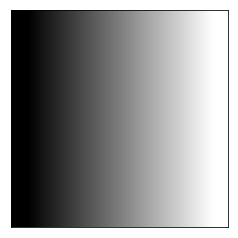

In [24]:
plot(img)

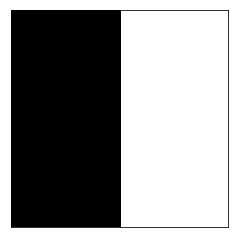

In [25]:
plot(th)

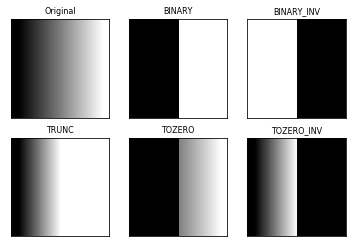

In [26]:
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

# 使用Matplotlib显示
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()

# Adaptive thresholds instead of fixed thresholds

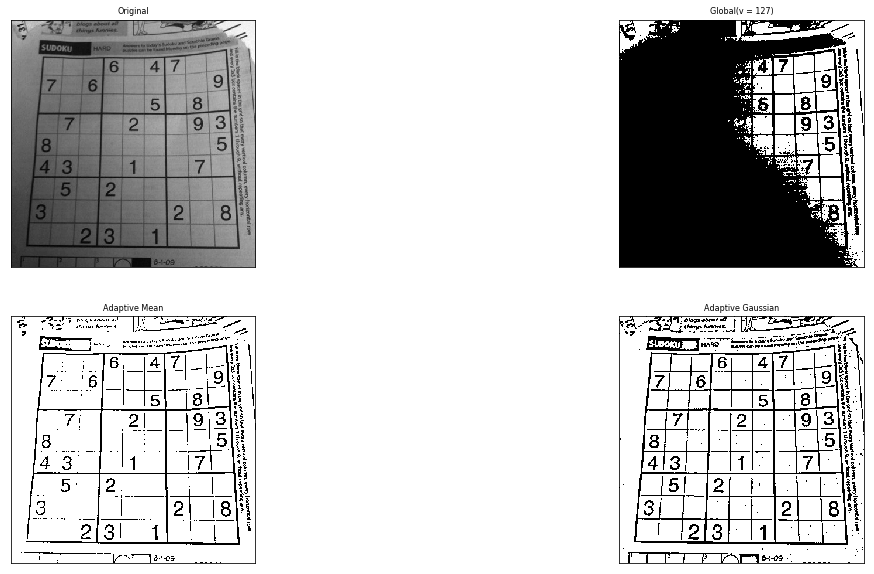

In [27]:

img = cv2.imread('./photos/sudoku.jpg', 0)

# fixed
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Adaptive
th2 = cv2.adaptiveThreshold(
    img, 255, # max
    cv2.ADAPTIVE_THRESH_MEAN_C,# mean over a small area
    cv2.THRESH_BINARY, # binary methods as before
    11, # definition of small area: 11*11
    20 # adjustement to small area mean
)
th3 = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 17, 6)

titles = ['Original', 'Global(v = 127)', 'Adaptive Mean', 'Adaptive Gaussian']
images = [img, th1, th2, th3]

plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()

# Transformation

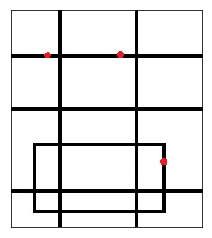

In [28]:
img = cv2.imread('./photos/drawing.jpg', 1)
plot(img)

In [29]:
img.shape

(300, 264, 3)

## Scaling

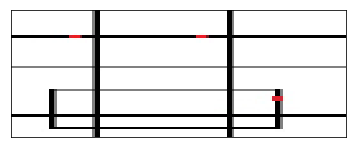

In [30]:
res = cv2.resize(img, (132, 50))
plot(res)

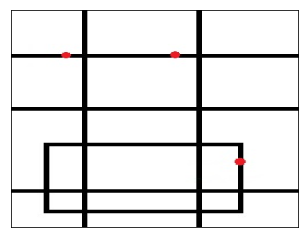

In [31]:
res2 = cv2.resize(img, None, fx=3, fy=2, interpolation=cv2.INTER_LINEAR)
plot(res2)

## Flip

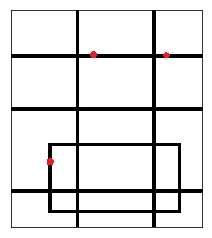

In [32]:
# 0 - by X axis, pb
# 1 - by Y axis, db
# -1 - by both axes
dst = cv2.flip(img, 
               1) 

plot(dst)

## Move

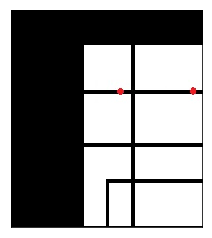

In [33]:
rows, cols = img.shape[:2]
M = np.float32([[1, 0, 100], [0, 1, 50]]) # X axis by 100, y axis by 50
dst = cv2.warpAffine(img, M, (cols, rows))
plot(dst)

## Rotate

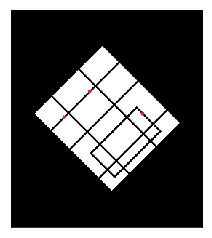

In [34]:
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 
                            45,  # rotate by 45 degree
                            0.5) # scale by 0.5
dst = cv2.warpAffine(img, M, (cols, rows))
plot(dst)

## Perspective Transform

More on transformation: https://tianchi.aliyun.com/course/courseConsole?courseId=40992&chapterIndex=1&sectionIndex=13

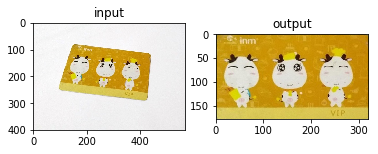

In [35]:
img = cv2.imread('./photos/card.jpg')

# 4 points from previous fig
pts1 = np.float32([[148, 80], [437, 114], [94, 247], [423, 288]])
# 4 points after transformation 
pts2 = np.float32([[0, 0], [320, 0], [0, 178], [320, 178]])

# Generate transform matrix
M = cv2.getPerspectiveTransform(pts1, pts2)
# Get Tranformed fig
dst = cv2.warpPerspective(img, M, 
                          (320, 178) # new fig size
                         )

plt.subplot(121), plt.imshow(img[:, :, ::-1]), plt.title('input')
plt.subplot(122), plt.imshow(dst[:, :, ::-1]), plt.title('output')
plt.show()

# Drawing

In [36]:
img = np.zeros((512, # L
                512, # W
                3 # num of channels
               ), np.uint8)

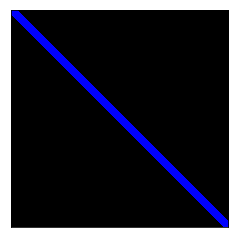

In [37]:
cv2.line(img, 
         (0, 0), # start
         (512, 512), # end
         (255, 0, 0), #color, BGR
         15) # line width
plot(img)

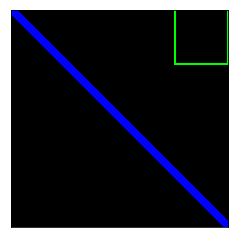

In [38]:
cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)
plot(img)

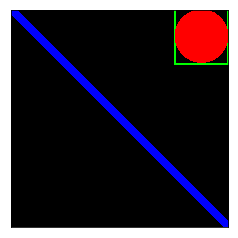

In [39]:
cv2.circle(img, 
           (447, 63),#center
           63, 
           (0, 0, 255), 
           -1 # fill
          )
plot(img)

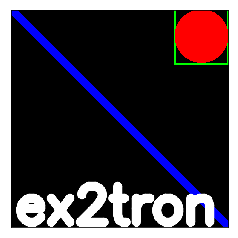

In [40]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 
            'ex2tron', 
            (10, 500), 
            font,
            4, # scale
            (255, 255, 255), 
            20,# width 
            lineType=cv2.LINE_AA)
plot(img)

## Draw by mouse

In [90]:
drawing = False 
start = (-1, -1)

def mouse_event(event, x, y, flags, param):
    global start, drawing, mode
    
    # press left button, start
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        start = (x, y)
        
    # move mouse, keep drawing
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.rectangle(img, start, (x, y), (0, 255, 0), 1)
    
    # release left button, end drawing
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img, start, (x, y), (0, 255, 0), 1)
            
img = np.zeros((512, 512, 3), np.uint8) # start with black
cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_event) # 

while(True):
    cv2.imshow('image', img)
    if cv2.waitKey(1) == 27:
        break

# Calculations

In [41]:
# Add
x = np.uint8([250])
y = np.uint8([10])

#if  cellcvalue < 255 : new_cellvalue=cellvalue else  cellcvalue < 255: new_cellvalue=255
print(cv2.add(x, y))  # 250+10 = 260 => 255
print(x + y)  # 250+10 = 260 % 256 = 4

[[255]]
[4]


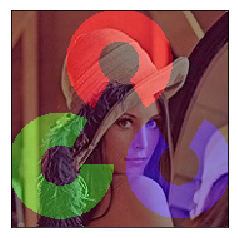

In [42]:
# Weighed Average
img1 = cv2.imread('./photos/lena_small.jpg')
img2 = cv2.imread('./photos/opencv-logo-white.png')

res = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)
plot(res)

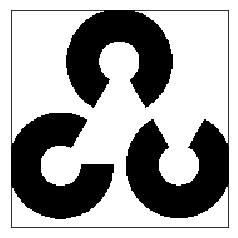

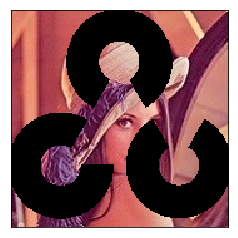

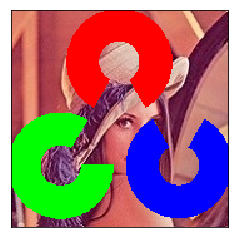

In [64]:
# Bit-wise calculation
roi = img1 #lena_small

img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) # convert logo to grey
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY) # create black/white bimnary
mask_inv = cv2.bitwise_not(mask) # create mask

img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv) #apply mask
dst = cv2.add(img1_bg, img2) # add
plot(mask_inv)
plot(img1_bg)
plot(dst)

# Filtering

$$kernel = \frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \\ \end{bmatrix}$$

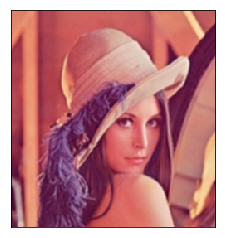

In [44]:
img = cv2.imread('./photos/lena.jpg')
blur = cv2.blur(img, (3, 3))
plot(blur)

$$kernel = a\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \\ \end{bmatrix}$$

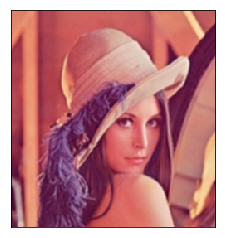

In [45]:
blur = cv2.boxFilter(img, -1, (3, 3), 
                     normalize=True # a = 1/9
                    )
plot(blur)

## Gaussian Filter

For Gaussian Noise:

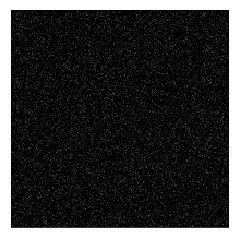

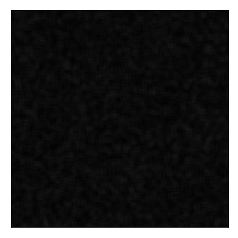

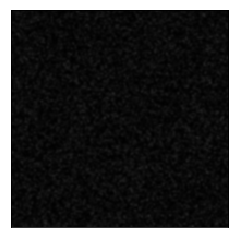

(None, None, None)

In [46]:
img = cv2.imread('./photos/gaussian_noise.bmp')

blur = cv2.blur(img, (5, 5))  # Mean
gaussian = cv2.GaussianBlur(img,  # Gaussian
                            (5, 5), # 5 * 5 kernel
                            1 # sigma = 1, higher sigma, more smoothing
                             # if sigma <=0, sigma=0.3*((ksize-1)*0.5 - 1) + 0.8
                           ) 
plot(img), plot(blur), plot(gaussian)

## Median Noise

For Salt Noise

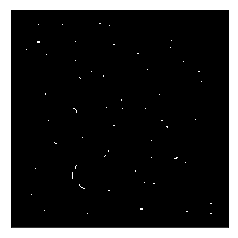

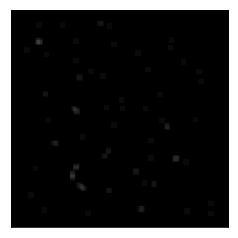

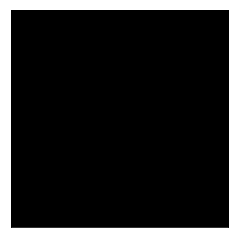

(None, None, None)

In [47]:
img = cv2.imread('./photos/salt_noise.bmp', 0)
blur = cv2.blur(img, (5, 5))  # Meana
median = cv2.medianBlur(img, 5)  # Median
plot(img), plot(blur), plot(median)

## Bilateral Filter

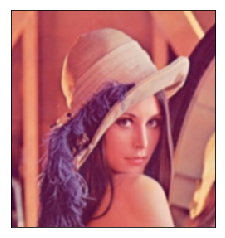

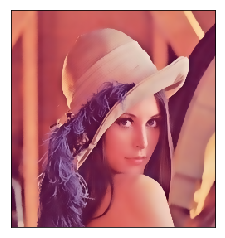

(None, None)

In [48]:
img = cv2.imread('./photos/lena.jpg')
gau = cv2.GaussianBlur(img, (5, 5), 0)  # Gaussian
blur = cv2.bilateralFilter(img, 9, 75, 75)  # Bilateral
plot(gau), plot(blur)

# Edge Detection

In [52]:
img = cv2.imread('./photos/handwriting.jpg', 0)
edges = cv2.Canny(img, 30, 70)  # canny edge detection

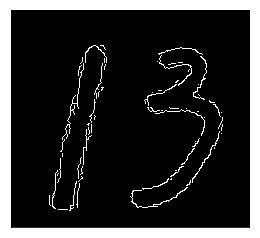

In [53]:
plot(edges)

# Erode and Dilate

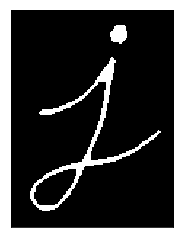

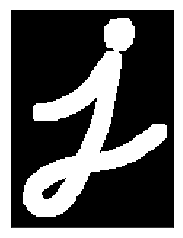

(None, None)

In [55]:
img = cv2.imread('./photos/j.bmp', 0)
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel)
dilation = cv2.dilate(img, kernel) 
plot(erosion), plot(dilation)

# Find Contour

Difference between contour and edge:
- Edge: used for figure features
- Contour: used for calculating area

In [29]:
img = cv2.imread('./photos/handwriting.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) # ASutomatically Find threshold
contours, hierarchy = cv2.findContours(thresh, 
                                       cv2.RETR_TREE, # Method to identify contour
                                       cv2.CHAIN_APPROX_SIMPLE) # Approximation of contour
print(len(contours))

2


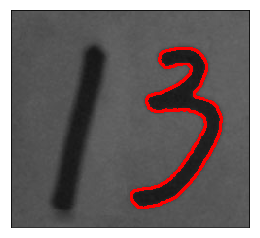

In [30]:
cnt = contours[0]
x = cv2.drawContours(img, [cnt], 0, (0, 0, 255), 2)
plot(x)

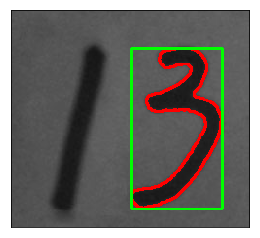

In [32]:
# Rectangle
x, y, w, h = cv2.boundingRect(cnt) 
plot(cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2))

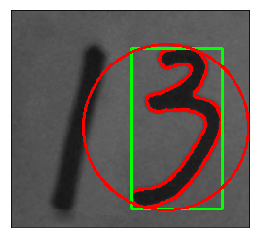

In [34]:
# Circle
(x, y), radius = cv2.minEnclosingCircle(cnt)
(x, y, radius) = np.int0((x, y, radius)) 
plot(cv2.circle(img, (x, y), radius, (0, 0, 255), 2))

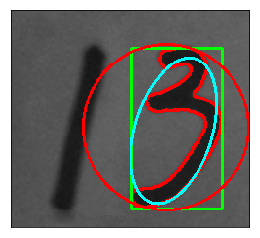

In [37]:
# Ellipse
ellipse = cv2.fitEllipse(cnt)
plot(cv2.ellipse(img, ellipse, (255, 255, 0), 2))


# Histogram

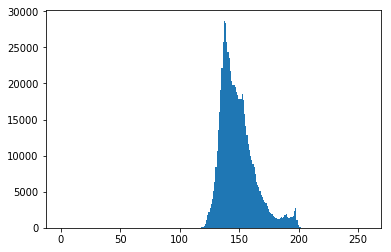

In [39]:
img = cv2.imread('./photos/hist.jpg', 0)
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

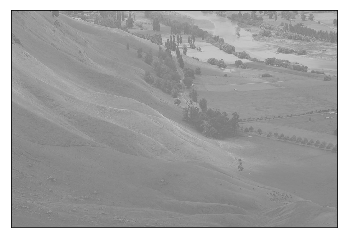

In [40]:
plot(img)

Histogram equalization

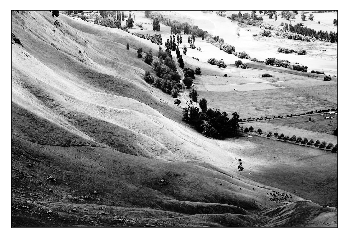

In [41]:
equ = cv2.equalizeHist(img)
plot(equ)


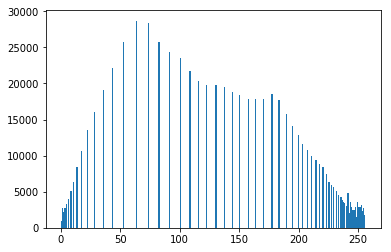

In [42]:
plt.hist(equ.ravel(), 256, [0, 256])
plt.show()

# Hough Line Transformation

How it works: https://docs.opencv.org/2.4.13.7/doc/tutorials/imgproc/imgtrans/hough_lines/hough_lines.html

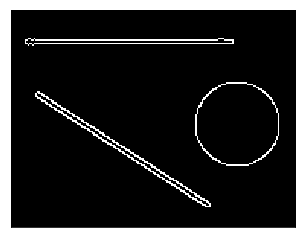

In [48]:
# Convert to binary image
img = cv2.imread('./photos/shapes.jpg')
drawing = np.zeros(img.shape[:], dtype=np.uint8)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
plot(edges)

In [49]:
# 2. Hough Line Transformation
lines = cv2.HoughLines(edges, 0.8, np.pi / 180, 90)

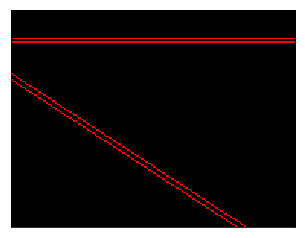

In [50]:
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(drawing, (x1, y1), (x2, y2), (0, 0, 255))
plot(drawing)

In [51]:
#Probabilistic Hough Transform
drawing = np.zeros(img.shape[:], dtype=np.uint8)
lines = cv2.HoughLinesP(edges, 0.8, np.pi / 180, 90,
                        minLineLength=50, maxLineGap=10)


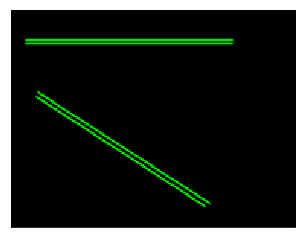

In [52]:
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(drawing, (x1, y1), (x2, y2), (0, 255, 0), 1, lineType=cv2.LINE_AA)
plot(drawing)

# Exercise Lane Detection

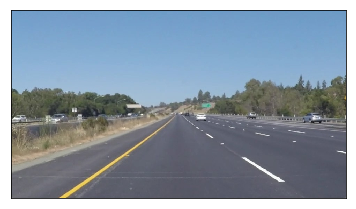

In [54]:
img = cv2.imread('./cv2_lane_detection_material/test_pictures/lane.jpg')
plot(img)

Graying

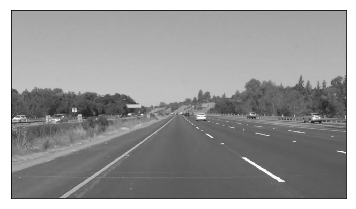

In [55]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plot(gray)

Filtering

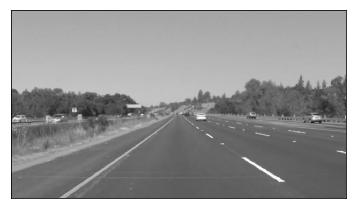

In [56]:
blur_ksize = 5
blur_gray = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize), 1)
plot(blur_gray)

Edge Detection

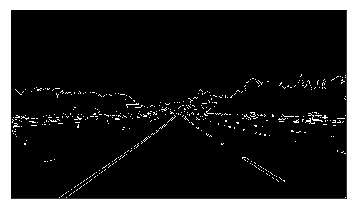

In [58]:
canny_lth = 50
canny_hth = 150
edges = cv2.Canny(blur_gray, canny_lth, canny_hth)
plot(edges)

Define ROI mask manually

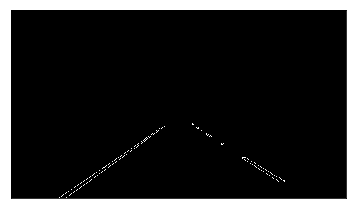

In [64]:
rows, cols = edges.shape
corner_points = np.array([[(0, rows), (460, 325), (520, 325), (cols, rows)]]) # trapezoid
mask = np.zeros_like(edges)
cv2.fillPoly(mask, corner_points, 255)
roi_edges = cv2.bitwise_and(edges, mask)
plot(roi_edges)

Probabilistic Hough Transform

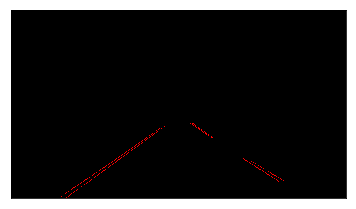

In [75]:
rho = 1
theta = np.pi / 180
threshold = 15
min_line_len = 40
max_line_gap = 20
color=[0, 0, 255]
thickness=1

lines = cv2.HoughLinesP(roi_edges, 
                        rho, 
                        theta, 
                        threshold, 
                        minLineLength = min_line_len, 
                        maxLineGap = max_line_gap)
drawing = np.zeros((roi_edges.shape[0], 
                    roi_edges.shape[1], 3), 
                    dtype=np.uint8)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(drawing, (x1, y1), (x2, y2), color, thickness)
plot(drawing)

Then apply OLS to extract left and right lane.